<a href="https://colab.research.google.com/github/YASH-25/Mahine-Learning/blob/main/LAB_6%267.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-Processing**

In [ ]:
import pandas as pd
data = pd.read_csv("/content/Drug_Consumption_Quantified.csv")

In [ ]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [ ]:
strings = ["Alcohol","Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack","Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms","Nicotine", "Semer", "VSA"]
for i in strings:
  print(i)
  uniqueList = data[i].unique()
  dic = {}
  for i in range(len(uniqueList)):
    dic[uniqueList[i]] = i
  data.replace({ i : dic }, inplace = True)

Alcohol
Amphet
Amyl
Benzos
Caff
Cannabis
Choc
Coke
Crack
Ecstasy
Heroin
Ketamine
Legalh
LSD
Meth
Mushrooms
Nicotine
Semer
VSA


In [ ]:
data = data.replace({"Alcohol" : dic,"Amphet" : dic,"Amyl" : dic,"Benzos" : dic,"Caff" : dic,"Cannabis" : dic,"Choc" : dic,"Coke" : dic,"Crack" : dic,"Ecstasy" : dic,"Heroin" : dic,"Ketamine" : dic,"Legalh" : dic,"LSD" : dic,"Meth" : dic,"Mushrooms" : dic,"Nicotine" : dic,"Semer" : dic,"VSA" : dic})

In [ ]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,5,0,0,0,4,2,0,6,0,0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,1,0,1,0,0,0,1,0,0,0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,1,0,0,0,0,0,0,4,0,0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,3,0,1,1,0,0,4,4,0,0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,1,0,1,0,0,0,0,3,0,0


# **Decision Tree Classifier**

|--- feature_14 <= 0.50
|   |--- feature_25 <= 0.50
|   |   |--- feature_10 <= -1.45
|   |   |   |--- class: 0
|   |   |--- feature_10 >  -1.45
|   |   |   |--- class: 0
|   |--- feature_25 >  0.50
|   |   |--- feature_1 <= 0.21
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.21
|   |   |   |--- class: 0
|--- feature_14 >  0.50
|   |--- feature_1 <= -0.52
|   |   |--- feature_16 <= 1.00
|   |   |   |--- class: 0
|   |   |--- feature_16 >  1.00
|   |   |   |--- class: 0
|   |--- feature_1 >  -0.52
|   |   |--- feature_23 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_23 >  0.50
|   |   |   |--- class: 0



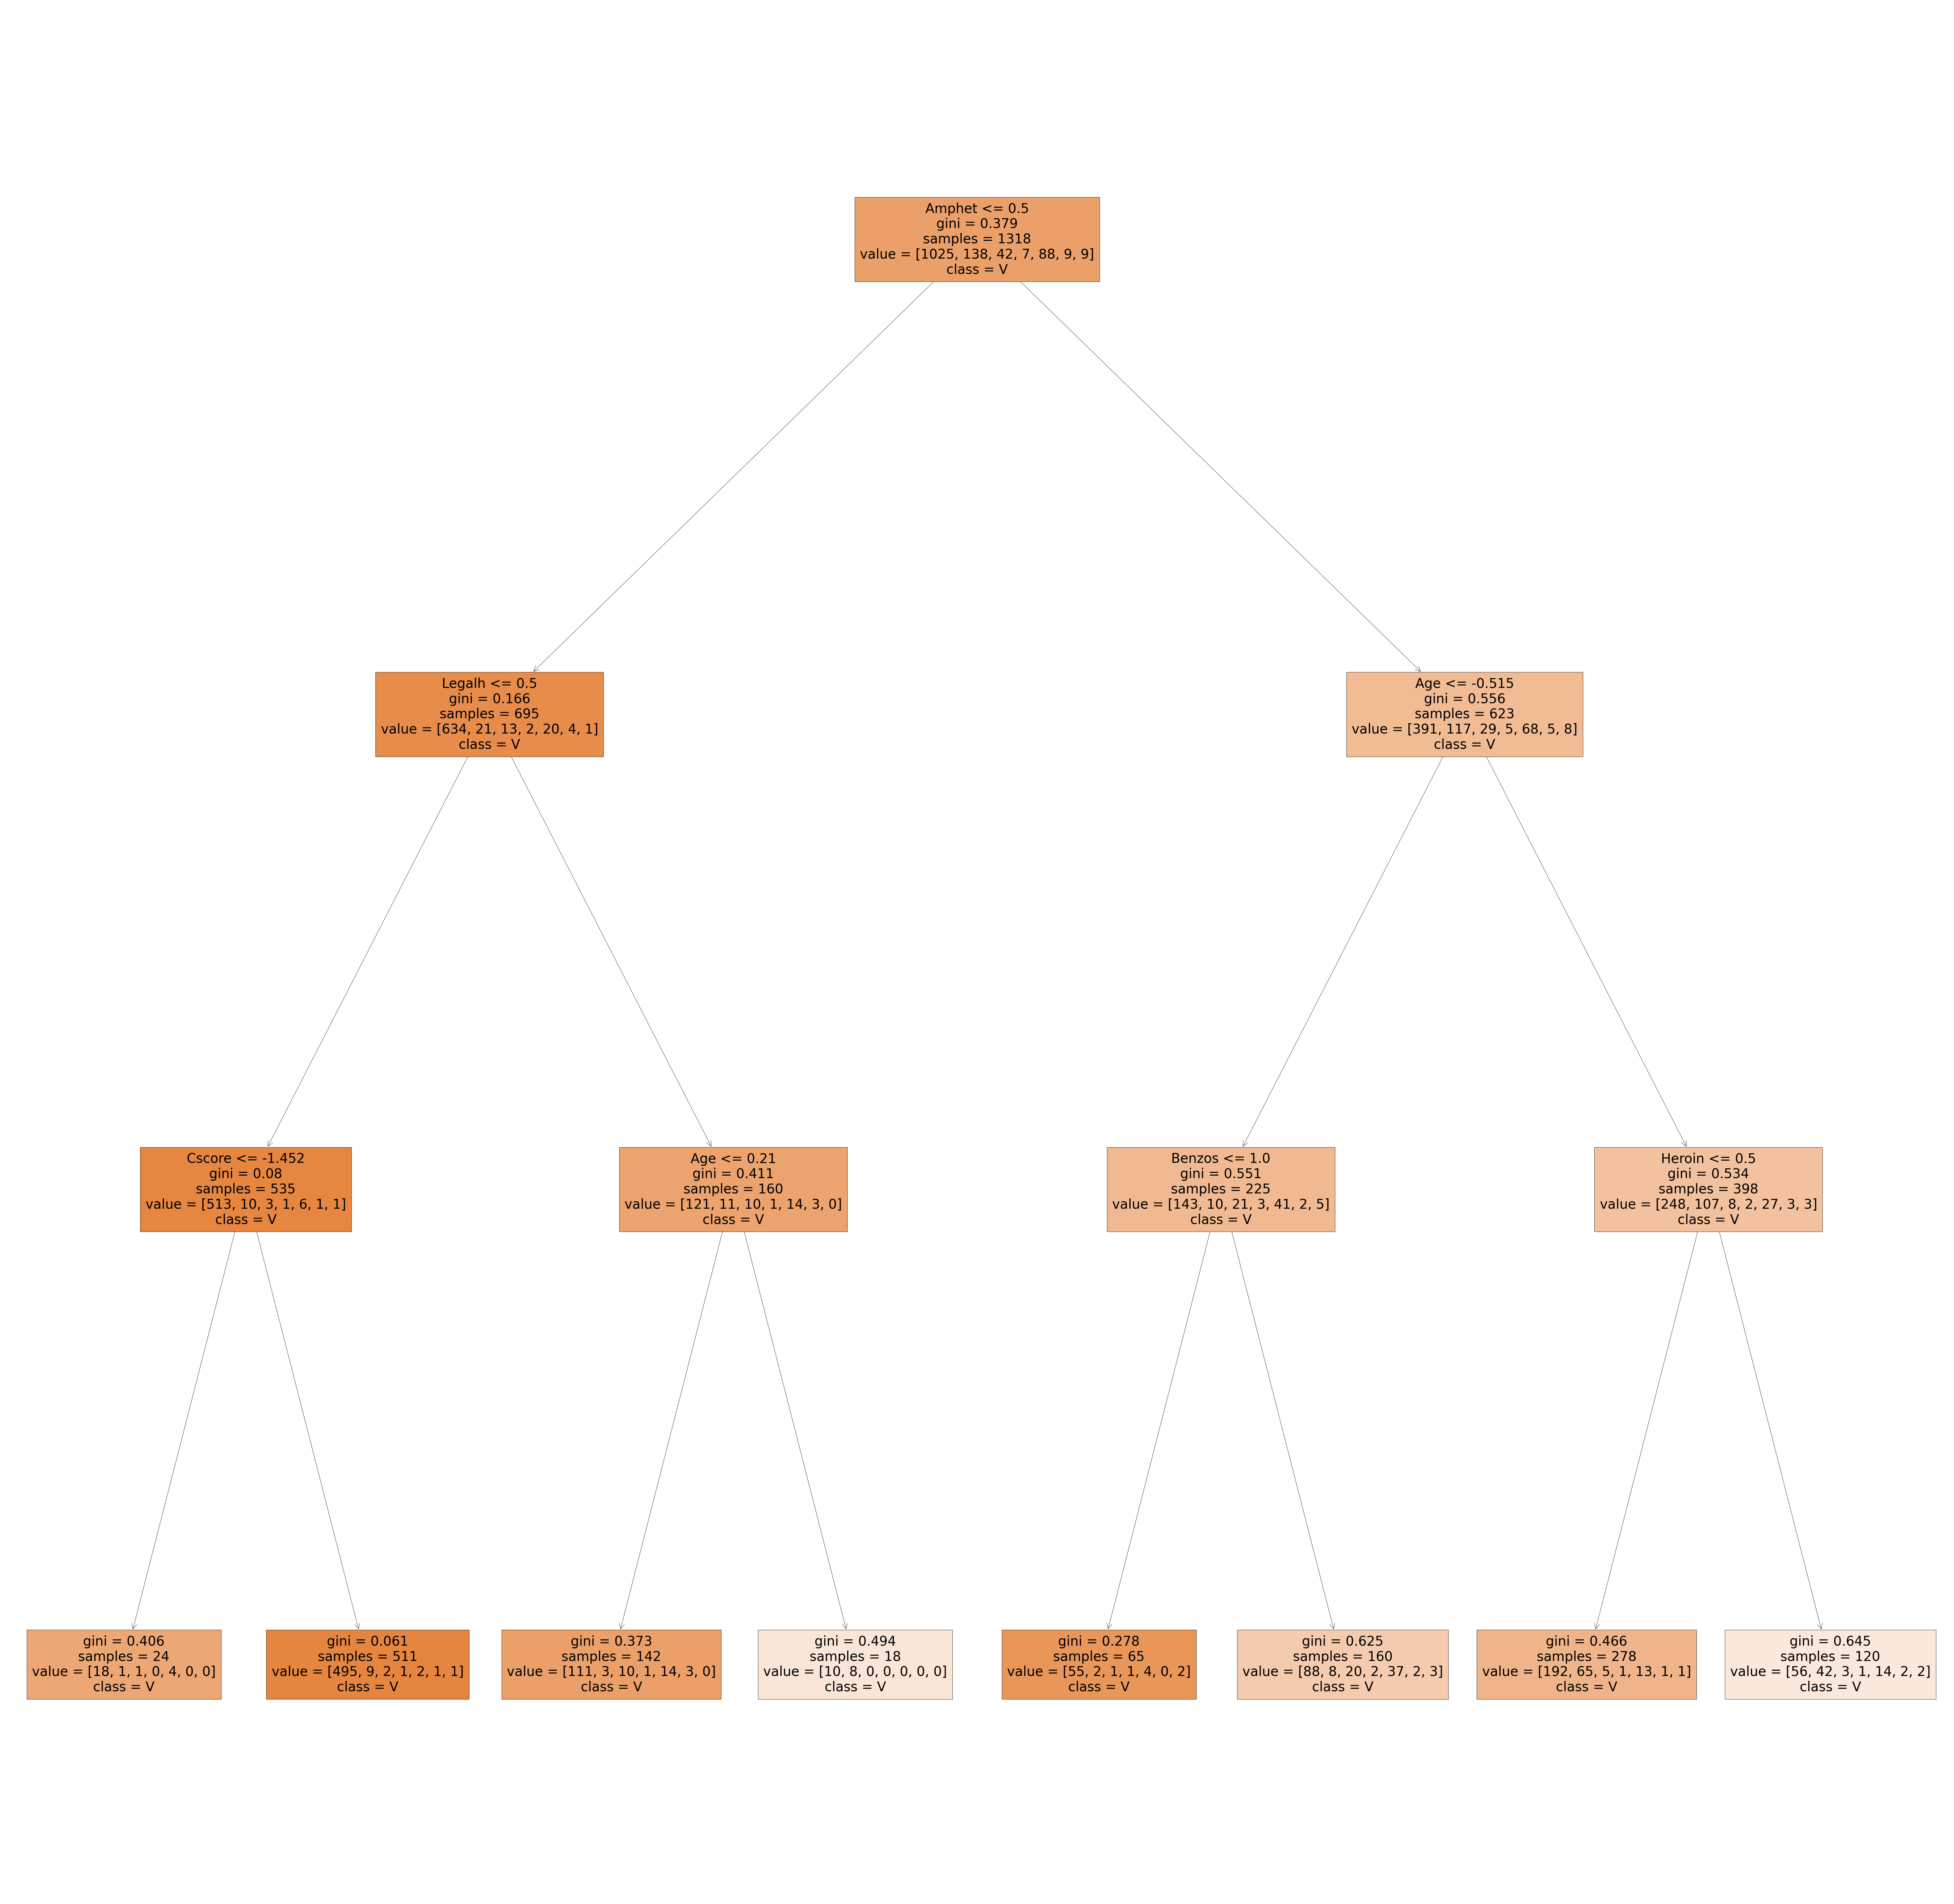

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

xTrain, xTest, yTrain, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:,-1:], test_size = 0.3, random_state = 100)

dtc = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
model = dtc.fit(xTrain, yTrain)
text_representation = tree.export_text(dtc)
print(text_representation)

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(128,128))
_ = tree.plot_tree(dtc, 
                   feature_names=data.columns[:-1],  
                   class_names=data.columns[-1],
                   filled=True)

In [ ]:
corr_matrix = data.corr().abs()

In [ ]:
print(corr_matrix["Nscore"])

ID           0.018943
Age          0.136755
Gender       0.074501
Education    0.100986
Country      0.136366
Ethnicity    0.047293
Nscore       1.000000
Escore       0.431004
Oscore       0.010275
AScore       0.216865
Cscore       0.391098
Impulsive    0.174445
SS           0.080225
Alcohol      0.027366
Amphet       0.110529
Amyl         0.018249
Benzos       0.217016
Caff         0.000506
Cannabis     0.102214
Choc         0.036394
Coke         0.127595
Crack        0.105361
Ecstasy      0.013549
Heroin       0.152563
Ketamine     0.035878
Legalh       0.103725
LSD          0.071642
Meth         0.162042
Mushrooms    0.048342
Nicotine     0.078627
Semer        0.006556
VSA          0.096764
Name: Nscore, dtype: float64


# **Linear Regression**

**Age vs Cannabis for age** (Age dependent, cannabis Independent)

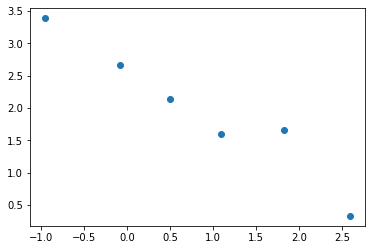

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = data["Age"].unique()
y = []

for i in x:
  avgBp = data.query("Age == @i")["Cannabis"].mean()
  y.append(avgBp)
plt.scatter(x,y)

**Age and Heroin are corelated**

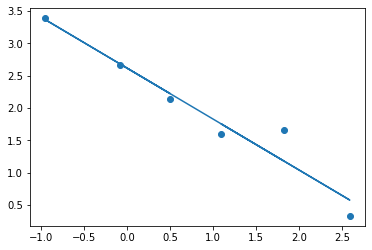

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

# **Linear Regression without normalization**

**Age vs Heroin without normalization**

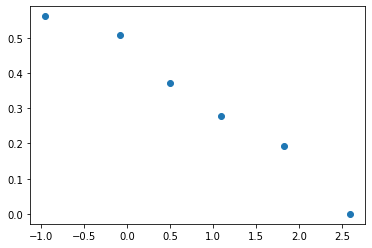

In [ ]:
x = data["Age"].unique()
y = []

for i in x:
  avgBp = data.query("Age == @i")["Heroin"].mean()
  y.append(avgBp)
plt.scatter(x,y)

## **LAB-7**

**Apply Logistic regression and decision tree**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Drug_Consumption_Quantified.csv")

In [ ]:
strings = ["Alcohol","Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack","Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms","Nicotine", "Semer", "VSA"]
for i in strings:
  print(i)
  uniqueList = df[i].unique()
  dic = {}
  for i in range(len(uniqueList)):
    dic[uniqueList[i]] = i
  df.replace({ i : dic }, inplace = True)

Alcohol
Amphet
Amyl
Benzos
Caff
Cannabis
Choc
Coke
Crack
Ecstasy
Heroin
Ketamine
Legalh
LSD
Meth
Mushrooms
Nicotine
Semer
VSA


In [ ]:
df = df.replace({"Alcohol" : dic,"Amphet" : dic,"Amyl" : dic,"Benzos" : dic,"Caff" : dic,"Cannabis" : dic,"Choc" : dic,"Coke" : dic,"Crack" : dic,"Ecstasy" : dic,"Heroin" : dic,"Ketamine" : dic,"Legalh" : dic,"LSD" : dic,"Meth" : dic,"Mushrooms" : dic,"Nicotine" : dic,"Semer" : dic,"VSA" : dic})

In [ ]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,6,0,4,0,4,2,0,6,0,0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,4,0,0,0,0,4,0,0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,4,4,0,0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,3,0,0


In [ ]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

logr.fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predY = []
for i in range(len(df) - 1):
  predY.append(logr.predict(df.iloc[i:i+1, : -1]))

In [ ]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,...,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,945.796178,0.034364,-0.000512,-0.003777,0.355221,-0.309808,-0.000119,0.000143,-0.000225,0.000242,...,1.548301,0.444268,0.690021,1.405520,1.218684,0.787686,1.433652,2.461783,0.012739,0.547240
std,544.877779,0.878529,0.482588,0.950330,0.700382,0.165967,0.998345,0.997625,0.996402,0.997481,...,2.038999,1.228349,1.512731,1.918435,1.808386,1.575684,1.896514,1.794878,0.223065,1.245448
min,2.000000,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,474.750000,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,946.500000,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,1417.250000,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,...,3.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000
max,1888.000000,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [ ]:
testX = df.iloc[:,:-1]
logr.score(testX, testY)

KeyError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

xTrain, xTest, yTrain, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:,-1:], test_size = 0.3, random_state = 100)

dtc = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
model = dtc.fit(xTrain, yTrain)
text_representation = tree.export_text(dtc)
print(text_representation)

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(128,128))
_ = tree.plot_tree(dtc, 
                   feature_names=data.columns[:-1],  
                   class_names=data.columns[-1],
                   filled=True)

ValueError: ignored

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv
data = pd.read_csv("hcvdat0.csv")

for i in data.columns:
  if(data[i].isnull().values.any()):
    data[i].fillna(data[i].mean(),inplace = True)
    print("Replaced null values with average in the column :", i)
  else:
    print("No null values for the column :", i)


stringValues = ["Category", "Sex"]

for i in stringValues:
  # get all unique values in a list. Index of each 
  uniqueList = data[i].unique()
  # Create replace dictionary with key as string to be replaced and value as integer encoding for the string
  replaceDict = {}
  for j in range(len(uniqueList)):
    replaceDict[uniqueList[j]] = j
  data = data.replace({i : replaceDict})

for i in data.drop(stringValues, axis = 1).columns:
    data[i] = data[i]  / data[i].abs().max()
data.head()

--2022-09-14 04:04:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46183 (45K) [application/x-httpd-php]
Saving to: ‘hcvdat0.csv.2’

hcvdat0.csv.2       100%[===================>]  45.10K  --.-KB/s    in 0.06s   

2022-09-14 04:04:09 (812 KB/s) - ‘hcvdat0.csv.2’ saved [46183/46183]

No null values for the column : Unnamed: 0
No null values for the column : Category
No null values for the column : Age
No null values for the column : Sex
Replaced null values with average in the column : ALB
Replaced null values with average in the column : ALP
Replaced null values with average in the column : ALT
No null values for the column : AST
No null values for the column : BIL
No null values for the column : CHE
Replaced null values with average in the 

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.001626,0,0.415584,0,0.468370,0.126020,0.023670,0.068210,0.029528,0.422303,0.334023,0.098230,0.018590,0.766667
1,0.003252,0,0.415584,0,0.468370,0.168747,0.055334,0.076235,0.015354,0.680683,0.496381,0.068576,0.023967,0.850000
2,0.004878,0,0.415584,0,0.570560,0.179309,0.111282,0.162346,0.024016,0.538696,0.537746,0.079696,0.051006,0.881111
3,0.006504,0,0.415584,0,0.525547,0.124820,0.094067,0.069753,0.074409,0.446679,0.490176,0.074136,0.051928,0.841111
4,0.008130,0,0.415584,0,0.476886,0.177868,0.100215,0.076543,0.037795,0.557587,0.446743,0.070429,0.045936,0.763333


In [ ]:
data["Category"].unique()

array([0, 1, 2, 3, 4])

In [ ]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()

x = data.drop(["Category"], axis = 1)
y = data["Category"]

logr.fit(x,y)

LogisticRegression()

In [ ]:
logr.score(x,y)

0.9382113821138212

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

xTrain, xTest, yTrain, ytest = train_test_split(data.drop(["Category"], axis = 1), data["Category"], test_size = 0.3, random_state = 100)

dtc = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
model = dtc.fit(xTrain, yTrain)
text_representation = tree.export_text(dtc)
print(text_representation)

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(128,128))

|--- feature_0 <= 0.87
|   |--- class: 0
|--- feature_0 >  0.87
|   |--- feature_0 <= 0.95
|   |   |--- feature_0 <= 0.92
|   |   |   |--- class: 2
|   |   |--- feature_0 >  0.92
|   |   |   |--- class: 3
|   |--- feature_0 >  0.95
|   |   |--- class: 4



<Figure size 9216x9216 with 0 Axes>